### HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [4]:
def find_product(a,r,N):
    arr_product = [a]
    for i in range (0, N-1):
        arr_product.append(arr_product[-1]*r)
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [5]:
def check_palindrome(N):
    copy_n = N
    res = 0
    while(N!=0):
        digit = N%10
        res = res*10 + digit
        N = int(N/10)
    check_palindrome = False
    if(res == copy_n):
        check_palindrome = True
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [6]:
def find_palindromes(N):
    start = 1000
    n = 0
    palindromes = []
    while (n != N):
        start+=1
        if(str(start) == str(start)[::-1]):
            n+=1
            palindromes.append(start)
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [7]:
from random import randint
def find_min(a, b, c):
    min_ = -101
    if (a <= b and a <= c):
        min_ = a
    if (b <= c and b <= a):
        min_ = b
    if (c <= a and c <= b):
        min_ = c
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-49 86 89 	Minimum: -49
45 -54 97 	Minimum: -54
68 24 -46 	Minimum: -46
14 -26 -64 	Minimum: -64
41 18 0 	Minimum: 0
64 -9 -1 	Minimum: -9
-20 -54 -64 	Minimum: -64
-42 39 -31 	Minimum: -42
-63 -22 89 	Minimum: -63
27 -81 -60 	Minimum: -81


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [13]:
my_array = np.random.rand(17)
summ = np.sum(my_array)
my_array = my_array/summ*6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')
#my_array - #check

Length: 17
Sum of elements: 6.000000000000001


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [7]:
def calculate_manhattan(a, b):    
    dif = abs(a-b)
    distance = dif.sum()
    return distance

def calculate_euclidean(a, b):    
    dif = a-b
    dif = np.power(dif,2)
    distance_sq = dif.sum()
    distance = np.sqrt(distance_sq)
    return distance

def calculate_chebyshev(a, b):    
    dif = abs(a-b)
    distance = dif.max()
    return distance

def calculate_cosine(a, b):
    aT = a.transpose();
    aTb = aT.dot(b)
    aPow2 = np.power(a,2)
    bPow2 = np.power(b,2)
    distanceAB = np.sqrt(aPow2.sum())*np.sqrt(bPow2.sum())
    distance = aTb/distanceAB
    #1-spatial.distance.cosine(a,b) - checked 
    return distance

In [8]:
np.random.seed(42)
a = np.random.randint(3,size=4)
b = np.random.randint(3,size=4)
print(a)
print(b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

[2 0 2 2]
[0 0 2 1]
Manhattan distance: 3
Euclidean distance: 2.23606797749979
Chebyshev distance: 2
Cosine distance: 0.7745966692414834


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [9]:
def transform(array):
    #  with keeping the order - sort?
    array.sort()
    return array

In [10]:
my_array = np.random.randint(4,size=76) -4
#transform(my_array) - не уверен что "сохранение порядка" - это сортировка
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4
Max: -1
Array:
[-2 -2 -2 -2 -1 -4 -1 -1 -1 -2 -3 -4 -3 -1 -1 -3 -3 -3 -1 -1 -4 -4 -1 -3
 -3 -4 -1 -4 -4 -2 -2 -2 -3 -1 -1 -1 -1 -2 -3 -3 -2 -3 -2 -1 -2 -1 -1 -4
 -2 -4 -2 -2 -4 -4 -2 -3 -1 -4 -1 -3 -3 -3 -4 -3 -4 -3 -1 -1 -2 -1 -2 -1
 -4 -1 -2 -2]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [11]:
my_array = np.random.randint(50,size=(8,5)) - 7
max_col = np.where(my_array == np.max(my_array))[1]
max_col = max_col[0] # Чтобы выводился только один столбец.
selected_column = my_array[:, max_col]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: \n {selected_column}')

Shape:  (8, 5)
Array:
[[ 6  9 28 42 32]
 [-4 -6 -2 34 -4]
 [21 10 18 36 26]
 [ 2 28  6 23 40]
 [ 7  0  6 15 32]
 [13  8 37 10 39]
 [16 18 17 37 33]
 [21  7 37 -7 17]]
Selected column: 
 [42 34 36 23 15 10 37 -7]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [33]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
#print(arr)
arr = np.nan_to_num(arr, nan=np.nanmean(arr))
print('Array:')
print(arr)

[0.11308232        nan 0.36337753        nan 0.65118865 0.84549363
        nan 0.98592777        nan 0.96618361]
Array:
[0.11308232 0.65420892 0.36337753 0.65420892 0.65118865 0.84549363
 0.65420892 0.98592777 0.65420892 0.96618361]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [36]:
def mean_channel(X):
    mean_vector = np.mean(X, axis = (0,1))
    return mean_vector

In [37]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(mean_channel(X))

[-2.09610984 -1.75286041 -1.90846682]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [38]:
def get_unique_rows(x):
    X_unique =np.unique(x, axis= 1)
    return X_unique

In [39]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
#print('Matrix:')
print(X)
print('Unique rows:')
get_unique_rows(X)

[[[4 5 4]
  [5 5 5]
  [4 4 5]]

 [[5 4 4]
  [4 5 5]
  [5 5 4]]

 [[5 4 5]
  [4 4 4]
  [5 5 5]]

 [[5 4 5]
  [4 5 4]
  [5 5 4]]

 [[4 4 4]
  [4 5 5]
  [4 4 5]]

 [[4 5 4]
  [4 5 4]
  [4 5 4]]

 [[5 4 5]
  [4 5 5]
  [4 5 5]]

 [[4 4 5]
  [5 4 4]
  [5 4 4]]

 [[5 5 5]
  [4 5 4]
  [5 5 5]]

 [[4 4 5]
  [4 5 5]
  [4 4 5]]

 [[4 4 4]
  [5 5 4]
  [5 5 5]]

 [[4 5 5]
  [5 5 4]
  [5 5 5]]

 [[5 5 5]
  [5 5 4]
  [4 4 5]]

 [[4 4 5]
  [4 4 5]
  [5 4 5]]

 [[4 4 4]
  [5 5 4]
  [5 5 5]]

 [[4 4 4]
  [5 4 4]
  [5 4 4]]

 [[5 5 4]
  [4 5 5]
  [5 5 4]]

 [[4 4 4]
  [5 4 5]
  [4 4 4]]

 [[5 4 4]
  [4 5 5]
  [4 4 4]]]
Unique rows:


array([[[4, 4, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [5, 4, 4],
        [4, 5, 5]],

       [[5, 5, 5],
        [5, 4, 5],
        [4, 4, 4]],

       [[5, 5, 4],
        [5, 4, 5],
        [4, 5, 4]],

       [[4, 4, 5],
        [4, 4, 4],
        [4, 5, 5]],

       [[4, 5, 4],
        [4, 5, 4],
        [4, 5, 4]],

       [[4, 5, 5],
        [5, 4, 5],
        [4, 5, 5]],

       [[5, 4, 4],
        [4, 4, 5],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 5, 5],
        [4, 5, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [4, 5, 5]],

       [[5, 5, 5],
        [4, 4, 4],
        [5, 5, 4]],

       [[5, 5, 5],
        [4, 5, 5],
        [5, 5, 4]],

       [[4, 4, 5],
        [5, 5, 5],
        [5, 5, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [4, 4, 5]],

       [[5, 5, 5],
        [4, 4, 4],
        [5, 5, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 5, 4],
        [5, 5, 4],
        [4, 5, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [17]:
dataset =  pd.read_csv("titanic.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [18]:
#Разделю ответы на задания. 1- Есть ли пропущенные значения и в каких столбцах если да
print(dataset.shape)
dataset.count()
# Исходя из логики, если строк 891 а значений меньше- есть пропущенные. Колонки:(Age(177), Cabin(687), Embarked(2))

(891, 12)


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

38.38383838383838


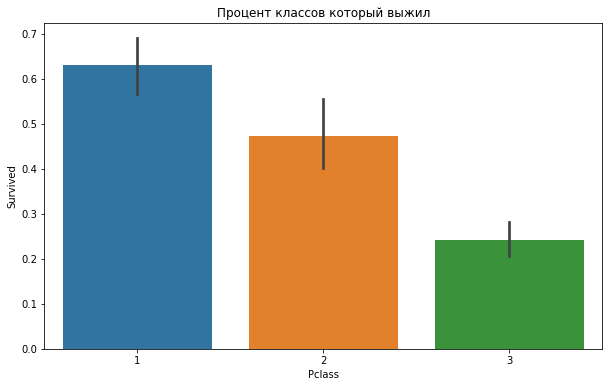

In [19]:
#2- сколько процентов выжило и соблюден ли баланс выживших и их классом
print(dataset['Survived'].mean()*100)
# - смотрим на mean и видим что ~38% выжило
plt.figure(figsize=(10,6))
plt.title("Процент классов который выжил")
sns.barplot(data = dataset, y=dataset['Survived'], x=dataset['Pclass'])
# Видим, что в процентах чем выше класс, тем больше выживших

([<matplotlib.patches.Wedge at 0x2767ea83f40>,
 [Text(0.4919453215643337, 0.9838647267744507, 'female'),
  Text(-0.4919452294482682, -0.9838647728336912, 'male')],
 [Text(0.2683338117623638, 0.5366534873315185, '35.2%'),
  Text(-0.26833376151723715, -0.5366535124547406, '64.8%')])

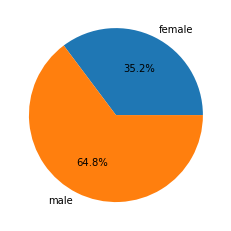

In [40]:
#3 Было ли больше женщин или мужчин (выживших?)
grby = dataset.groupby(['Sex'])
plt.pie(grby.size(), labels = grby.groups.keys(), autopct='%1.1f%%')
# Как мы видим, на борту было больше мужчин

([<matplotlib.patches.Wedge at 0x2767ea18f10>,
 [Text(0.911772230064993, 0.6153628201982223, 'C'),
  Text(0.12219517070335402, 1.0931918131127667, 'Q'),
  Text(-0.7128397429902672, -0.8377705537995295, 'S')],
 [Text(0.49733030730817795, 0.3356524473808485, '18.9%'),
  Text(0.06665191129273855, 0.5962864435160545, '8.7%'),
  Text(-0.38882167799469114, -0.4569657566179251, '72.4%')])

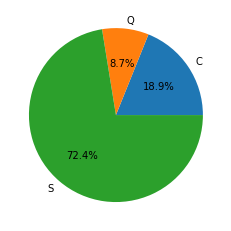

In [41]:
#4 Какой порт самый непопулярный?
grby = dataset.groupby(['Embarked'])
plt.pie(grby.size(), labels = grby.groups.keys(), autopct='%1.1f%%')
# Как мы видим, самый непопулярный порт - Q(Queenstown)

In [42]:
 #5 Как много классов было на Титанике?
dataset['Pclass'].value_counts().size
#dataset[:]['Pclass'].value_counts().size
#Три.

3

32.2042079685746
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Text(0, 0.5, 'Класс')

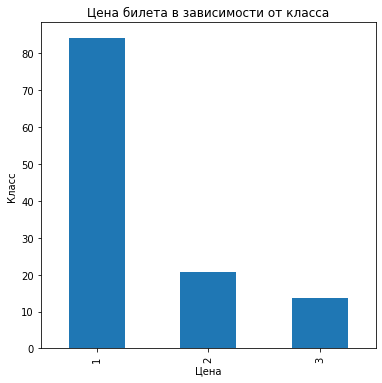

In [43]:
#6 средняя цена и цена для каждого класса
print(dataset['Fare'].mean())
print(dataset.groupby(['Pclass']).Fare.mean())
plt.figure(figsize=(6,6))
ax = dataset.groupby(['Pclass']).Fare.mean().plot.bar()
plt.title("Цена билета в зависимости от класса")
ax.set_xlabel('Цена')
ax.set_ylabel('Класс')
# Первое - цена средняя, второе - цена по классам, третье - график зависимость класса от цены (а почему нет)

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

минимальный возраст: 0.42, максимальный возраст: 80.0


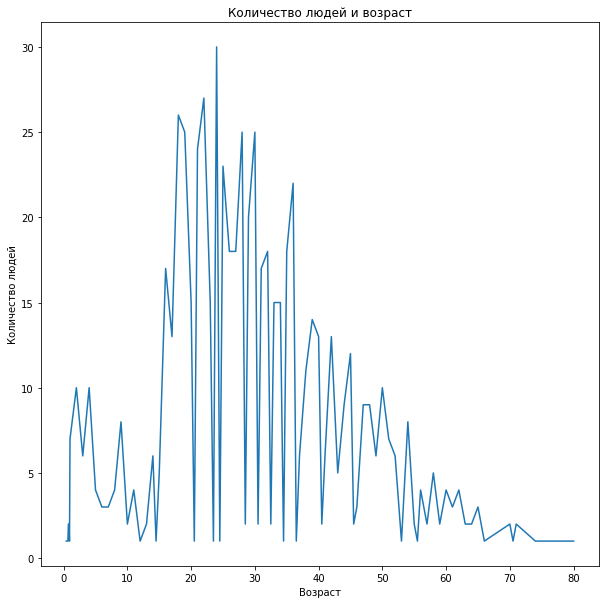

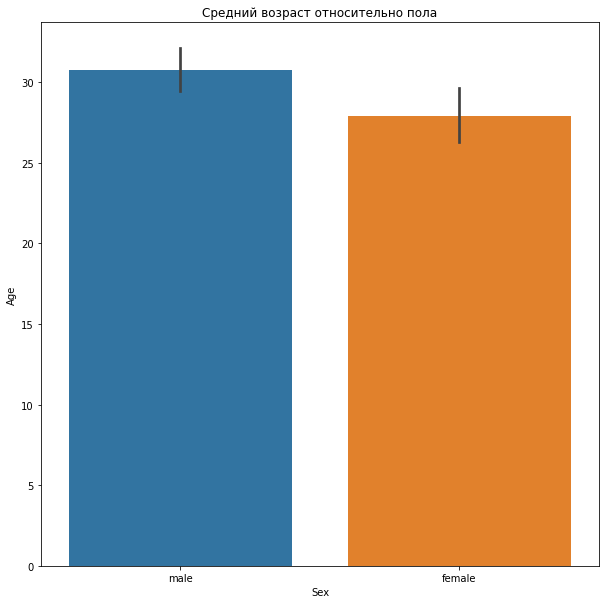

In [44]:
## Разобьем на первый второй график соответственно
plt.figure(figsize=(10,10))
plt.title("Количество людей и возраст")
points = dataset.Age.unique()
points.sort()
a = sns.lineplot(data = dataset, y=dataset.groupby(['Age']).size(), x =points[:-1])
a.set_xlabel('Возраст')
a.set_ylabel('Количество людей')
print(f'минимальный возраст: {dataset.Age.min()}, максимальный возраст: {dataset.Age.max()}')
#ура я это сделал (до последнего так как последний nan)
# (1)Как мы видим, минимальный возраст человека на борту - меньше года, а максимальный равен 80ти. На графике видно, что
# большинство людей в диапазоне от 15 до 40 лет, людей младше и старше - гораздо меньше.
plt.figure(figsize=(10,10))
plt.title("Средний возраст относительно пола")
#dataset.groupby(['Sex']).Age.mean().plot.bar()
sns.barplot(x=dataset['Sex'], y=dataset['Age'])
#(2) Мужчины в среднем более взрослые нежели женщины, но совсем ненамного

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [141]:
df = dataset[["Name", "Sex"]].copy()
df[["First name", "Last name"]] = df['Name'].str.split(',', expand=True)
# Создадим новый DF, так как старый ещё нужен для работы, там засплитим чтобы узнать имя и ещё раз чтобы узнать title
df[["Title", "Surname"]] = df['Last name'].str.split('.',1, expand=True)
df.drop(columns = ["Last name", "First name", "Surname", "Name"], inplace=True)
print(f'There is {df["Title"].nunique()} titles')
print("------------------------------------------------------")
print(f'Passengers with every title:\n {df["Title"].value_counts()}')
print("------------------------------------------------------")
print(f'The most common titles by sex:\n{df.groupby("Sex").Title.agg(pd.Series.mode)}')

There is 17 titles
------------------------------------------------------
Passengers with every title:
  Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Mme               1
 Sir               1
 Jonkheer          1
 Don               1
 Lady              1
 the Countess      1
 Ms                1
 Capt              1
Name: Title, dtype: int64
------------------------------------------------------
The most common titles by sex:
Sex
female     Miss
male         Mr
Name: Title, dtype: object


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**


Корреляция равна:-0.5494996199439078
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


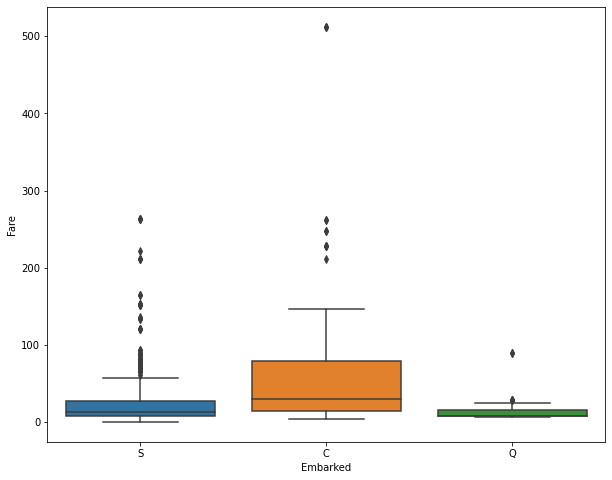

In [24]:
print(f'Корреляция равна:{dataset["Pclass"].corr(dataset["Fare"])}')
# Отрицательная корреляция - тоже зависимость. 0,54 - довольно сильная зависимость, так что да, Класс и цена взаимосвязаны(Логично)
print(dataset.groupby(['Embarked']).Fare.mean()) # Средняя цена для каждого класса
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(dataset.Embarked, dataset.Fare)
#Как мы и видим, Для C средняя цена больше, чем для остальных, и ещё есть несколько высоких "Выбросов", исходя из чего 
#Средняя цена выше чем у остальных. У S больше выбросов вверх, но средняя цена всё равно ниже

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [194]:
ds = dataset[["Embarked", "Fare"]].copy()
ds["Embarked"].replace(["S", "C", "Q"], [1,2,3], inplace=True)
#Так как переменная - категориальная, легче всего просто изменить значения на интовый, оттуда уже понять зависимость
#(Было пройдено на первом курсе на НИСе)
print(ds.Embarked.corr(ds.Fare))
#fig, ax = plt.subplots(figsize=(10,8))
#sns.boxplot(ds.Embarked, ds.Fare)
# Корреляции почти нет

0.06346234476922952


**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64


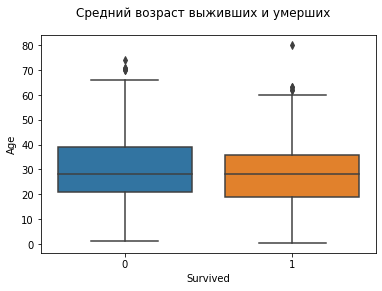

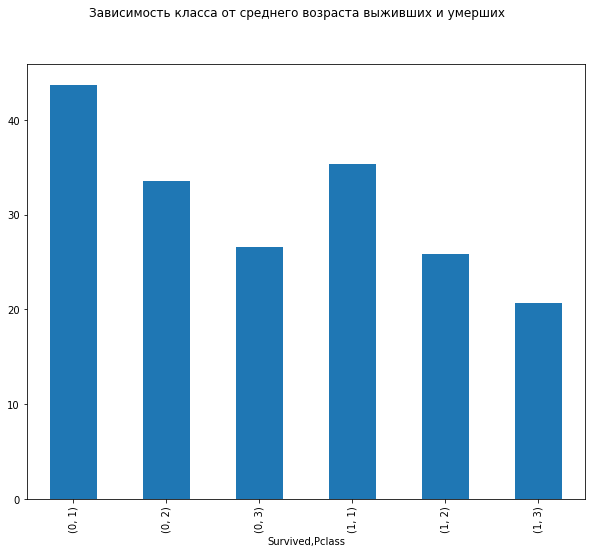

In [209]:
fig, ax = plt.subplots()
fig.suptitle('Средний возраст выживших и умерших')
sns.boxplot(dataset.Survived, dataset.Age)
print(dataset.groupby(['Survived']).Age.mean())
# Как мы видим, в среднем, хоть и немного, но выживали чаще более молодые люди.
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Зависимость класса от среднего возраста выживших и умерших')
print(dataset.groupby(['Survived', 'Pclass']).Age.mean())
dataset.groupby(['Survived', 'Pclass']).Age.mean().plot.bar()
# Средний возраст выживших/нет в том или ином классе. Они разные: чем лучше класс, тем выше средний возраст выживших
#И так же, чем лучше класс, тем средний возраст упокоенных выше.

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64


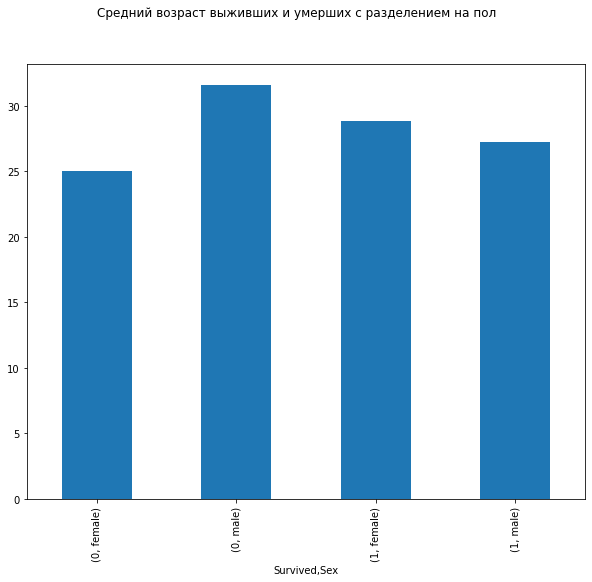

In [213]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Средний возраст выживших и умерших с разделением на пол')
dataset.groupby(['Survived', 'Sex']).Age.mean().plot.bar()
print(dataset.groupby(['Survived', 'Sex']).Age.mean())
#Как мы видим, средний возраст умерших мужчин больше, также средний возраст выживших женщин выше, чем у мужчин